<a href="https://colab.research.google.com/github/guilhermevicente11/analise-dados-churn/blob/main/analises_realizadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISE DOS COMPORTAMENTOS DAS VARIÁVEIS




O dataset que foi analisado representa um banco de clientes de um banco que atua em três países: França,Alemanha e Espanha.

A ideia desta análise é mapear o perfil dos clientes que saíram(exited = 1) da empresa e apresentar informações para um usuário externo.

Para realizar a análise foram utilizadas as bibliotecas pandas,matplotlib e seaborn.

In [ ]:
#importação das bibliotecas
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv('/content/churn.csv', sep=',')
df.head(5)

In [ ]:
df.drop(columns = ['CustomerId', 'Surname'], inplace = True)

In [ ]:
warnings.filterwarnings("ignore")
saida_pessoal = df.loc[df.Exited == 1]
fica_pessoal = df.query('Exited == 0')

# 2. Primeiras análises 

In [ ]:
#contar a quanitdade de clientes que saíram
df["Exited"].value_counts()
sns.countplot('Geography', hue = 'Exited', data = df)
plt.show()

In [ ]:
#contar a quantidade por gênero
df['Gender'].value_counts()


Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
#contar a quantidade por país
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
fig, ax = plt.subplots(3, 2, figsize = (20, 15))


sns.countplot('Geography',data = saida_pessoal, ax = ax[0][0]) #CONTAR A QTD QUE SAIU POR PAÍS
sns.countplot('Gender', data = saida_pessoal,ax = ax[0][1])

plt.tight_layout()
plt.show()

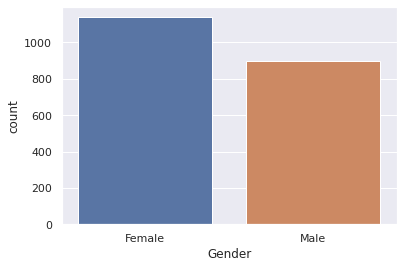

In [ ]:
#saida por genero
saida_pessoal = df.loc[df.Exited == 1]
saida_sexo = saida_pessoal["Gender"]
saida_sexo.value_counts()
sns.countplot('Gender', data = saida_pessoal)
plt.show()

In [ ]:
#saida por pais
saida_pais = saida_pessoal["Geography"]
saida_pais.value_counts()
#sns.countplot('Geography', hue = 'Exited', data = saida_pessoal)

Germany    814
France     810
Spain      413
Name: Geography, dtype: int64

In [ ]:
#media de idade do pessoal que saiu
saida_pessoal = df.loc[df.Exited == 1]
saida_idade = saida_pessoal[["Age",]]
saida_idade.mean().round(0)

Age    45.0
dtype: float64

In [ ]:
#correlação de saída por país
saida_pessoal.corr().round(2)

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.00,0.02,-0.00,-0.01,0.02,0.02,-0.01,0.05,-0.00,NaN
CreditScore,0.02,1.00,-0.01,0.03,0.02,0.00,-0.01,-0.00,-0.06,NaN
Age,-0.00,-0.01,1.00,-0.02,-0.02,-0.01,-0.03,-0.01,-0.00,NaN
Tenure,-0.01,0.03,-0.02,1.00,0.03,0.02,0.00,-0.04,0.05,NaN
Balance,0.02,0.02,-0.02,0.03,1.00,-0.02,-0.01,0.00,-0.01,NaN
NumOfProducts,0.02,0.00,-0.01,0.02,-0.02,1.00,-0.01,0.06,0.03,NaN
HasCrCard,-0.01,-0.01,-0.03,0.00,-0.01,-0.01,1.00,-0.07,-0.02,NaN
IsActiveMember,0.05,-0.00,-0.01,-0.04,0.00,0.06,-0.07,1.00,-0.01,NaN
EstimatedSalary,-0.00,-0.06,-0.00,0.05,-0.01,0.03,-0.02,-0.01,1.00,NaN
Exited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#media de idade por galera que sai por país
saida_pessoal = df.loc[df.Exited == 1]
saida_pais = saida_pessoal[["Age","Geography"]]
saida_pais.mean()

Age    44.837997
dtype: float64

In [ ]:
#media salario do pessoal que sai
saida_pessoal = df.loc[df.Exited == 1]
saida_salario = saida_pessoal[["EstimatedSalary"]]
saida_salario.mean().round(0)

EstimatedSalary    101466.0
dtype: float64

In [ ]:
#score medio dos clientes
df[["CreditScore"]].mean()

CreditScore    650.5288
dtype: float64

In [ ]:
#score medio dos clientes que ficam
fica_pessoal = df.loc[df.Exited == 0]
fica_score = fica_pessoal[["CreditScore"]]
score_media_fica = fica_score.mean()

In [ ]:
#score medio dos clientes que saem
saida_pessoal = df.loc[df.Exited == 1]
saida_score = saida_pessoal[["CreditScore","Exited"]]
score_medio_saida = saida_score.mean()

In [ ]:
#remover colunas desnecessárias para a análise
#df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)
#df.head()

In [ ]:
#identificar possíveis erros com salários baixos
menor_1000 = df[df['EstimatedSalary']<=100]
menor_1000

In [ ]:
#saida pelo tenure
saida_pessoal = df.loc[df.Exited == 1]
saida_tenure = saida_pessoal[["Tenure"]]
saida_tenure.value_counts()

In [ ]:
#saida produtos
saida_pessoal = df.loc[df.Exited == 1]
saida_produtos = saida_pessoal[["NumOfProducts"]]
saida_produtos.value_counts() 

sns.countplot('NumOfProducts', hue = 'Exited', data = saida_pessoal)
plt.show()
                               


In [ ]:
faixa4055 = df.query('40 <= Age <= 55')
sns.countplot('Age', hue = 'Exited', data = faixa4055)

In [ ]:
saida_pessoal.query('NumOfProducts == 1 & IsActiveMember == 0')

In [ ]:
#saida credit score #283fica #76sai
saida_pessoal = df.loc[df.Exited == 0]
saida_cs = saida_pessoal[["CreditScore"]]
saida_cs.value_counts()

In [ ]:
#galera que saiu com score maior que 700 e salário maior que 60000.
saiu_700 = df[(df.Exited == 1) & (df.CreditScore >= 700) & (df.EstimatedSalary >= 60000)]
saiu_700.sort_values(by = "EstimatedSalary")

In [ ]:
def faixa_score (score):
  if score <= 475:
    return '0-475'
  if score <= 600:
    return '475-600'
  if score <= 725:
    return '600-725'
  if score <= 850:
    return '725-850'

In [ ]:
df['score_quali'] = [faixa_score(score) for score in df.CreditScore.to_list()]
df['score_quali'].value_counts()

In [ ]:
saida_pelo_score = df.query("Exited == 1")
hist_age = sns.histplot(saida_pelo_score['score_quali'], kde= False, bins = 25 )
hist_age.figure.set_size_inches(15, 5)
hist_age.set_title('Distribuição de Frequências por score das pessoas que saíram', fontsize=20)
hist_age.set_xlabel('Score', fontsize=16)
hist_age
plt.show()

In [ ]:
#galera que sai por faixa de score
saida_pessoal = df.loc[df.Exited == 1]
saida_quali = saida_pessoal['score_quali']
saida_quali.value_counts()

600-725    910
475-600    573
725-850    462
0-475       92
Name: score_quali, dtype: int64

In [ ]:
#galera que saiu com saldo 0 !!!! 500
df.query('Balance == 0 & Exited == 1')


,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_quali
0,1,619,France,Female,42,2,0.0,1,1,1,101348.88,1,600-725
22,23,510,Spain,Female,38,4,0.0,1,1,0,118913.53,1,475-600
30,31,591,Spain,Female,39,3,0.0,3,1,0,140469.38,1,475-600
58,59,511,Spain,Female,66,4,0.0,1,1,0,1643.11,1,475-600
81,82,777,France,Female,32,2,0.0,1,1,0,136458.19,1,725-850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9784,9785,527,France,Male,39,4,0.0,2,1,0,167183.07,1,475-600
9884,9885,751,France,Female,48,4,0.0,1,0,1,30165.06,1,725-850
9898,9899,589,France,Male,38,4,0.0,1,1,0,95483.48,1,475-600
9962,9963,702,Spain,Male,44,9,0.0,1,0,0,59207.41,1,600-725


In [ ]:
#pessoal que saiu com balance 0 e não sendo membro ativo. !!!! 320 não ativos saíram, 180 saíram
df.query('Balance == 0 & Exited == 1 & IsActiveMember == 0')

In [ ]:
#salario menor que 50000 = 489
saida_50000 = df.query('EstimatedSalary < 50000 & Exited == 1 ')
saida_50000

In [ ]:
#salario entre 50000 e 1000 mil = 504
saida_cemmil = df.query('50000 < EstimatedSalary < 100000 & Exited == 1')
saida_cemmil

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_quali
88,89,646,France,Female,46,4,0.00,3,1,0,93251.42,1,600-725
109,110,479,Germany,Male,35,9,92833.89,1,1,0,99449.86,1,475-600
138,139,584,Spain,Female,48,2,213146.20,1,1,0,75161.25,1,475-600
164,165,683,Spain,Male,29,0,133702.89,1,1,0,55582.54,1,600-725
190,191,715,France,Female,41,8,56214.85,2,0,0,92982.61,1,600-725
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9947,9948,615,France,Male,34,1,83503.11,2,1,1,73124.53,1,600-725
9962,9963,702,Spain,Male,44,9,0.00,1,0,0,59207.41,1,600-725
9981,9982,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1,475-600
9991,9992,597,France,Female,53,4,88381.21,1,1,0,69384.71,1,475-600


In [ ]:
#saida menor que 150 e maior que 100 = 517
saida_150 = df.query('100000 < EstimatedSalary < 150000 & Exited == 1')
saida_150

In [ ]:
#saida menor que 200 e maior 150 = 527
saida_200 = df.query('200000 > EstimatedSalary > 150000 & Exited == 1')
saida_200

In [ ]:
#CRIANDO FAIXA DE

def faixa_salario(salario):
  if salario <= 50000:
    return 'Abaixo de 50k'
  if 100000 >= salario >= 50000:
    return '50k-100k'
  if 150000 >= salario >= 100000:
    return '100k-150k'
  if 200000 >= salario >= 150000:
    return '150k-200k'


In [ ]:
saida_pessoal

In [ ]:
#to_list é uma função que transforma coluna em lista para eu poder iterar
df['faixa_salario'] = [faixa_salario(salario) for salario in df.EstimatedSalary.to_list()]
saida_pessoal['faixa_salario'].value_counts()


In [ ]:
#150 - 200k: 231 pessoas com score entre 625 e 750 saíram.
score_0 = df.query('score_quali == "600-725" & EstimatedSalary > 100000" & Exited == 0 & NumOfProducts == 1')
score_0

In [ ]:
#100k - 150k: 238 pessoas com score entre 625 e 750 saíram.
score_3 = df.query('score_quali == "alto" & faixa_salario == "Entre 100k e 150k" & Exited == 1')
score_3

In [ ]:
#Galera que saiu com score entre 600-725 com salário maior que 100000
score_4 = df.query('score_quali == "600-725" & EstimatedSalary > 100000 & Exited == 1')
score_4

In [ ]:
hist_sal = sns.histplot(df['EstimatedSalary'], kde= False, bins = 25 )
hist_sal.figure.set_size_inches(10, 5)
hist_sal.set_title('Distribuição de Frequências por salário', fontsize=20)
hist_sal.set_xlabel('Salário', fontsize=16)
hist_sal
plt.show()

In [ ]:
#150 - 200k: 123 pessoas com score maior do que 750 saíram.
score_1 = df.query('score_quali == "excelente" & faixa_salario == "Entre 150k e 200k" & Exited == 1')
score_1

In [ ]:
#100k - 150k: 95 pessoas com com score maior do que 750 saíram
score_2 = df.query('score_quali == "excelente" & faixa_salario == "Entre 100k e 150k" & Exited == 1')
score_2

In [ ]:
#contagem de balance 0 do pessoal que saiu
saida_pessoal = df.loc[df.Exited == 1]
saida_pais = saida_pessoal[["Geography"]]
saida_pais.loc[df.Balance == 0].value_counts()

In [ ]:
sns.countplot('Geography', data = saida_pessoal)
plt.show()

In [ ]:
#Notei um alto numero de balance = 0 na frança é 337 e espanha é 163.
sns.displot(data = saida_pessoal, x="Balance", hue="Geography", col="Geography")

In [ ]:
#Saida por score por país
sns.displot(data=saida_pessoal, x="score_quali", hue="Geography", col="Geography")

In [ ]:
#Membros Inativos por país que saíram
sns.displot(saida_pessoal.loc[df.IsActiveMember == 0], x="Geography")

In [ ]:
#Membro Ativos por país que saíram
sns.displot(saida_pessoal.loc[df.IsActiveMember == 1], x="Geography")

In [ ]:
#Homem que tem salário entre 150 e 200, e score maior que 725 = 54
gender_0_m = df.query('score_quali == "725-850" & faixa_salario == "150k-200k" & Exited == 1  & Gender == "Male"' )
gender_0_m.info()

In [ ]:
#Mulher que tem salário entre 150 e 200, e score maior que 725 = 69
gender_0_f = df.query('score_quali == "725-850" & faixa_salario == "150k-200k" & Exited == 1  & Gender == "Female"' )
gender_0_f

Análise do gênero, não há nenhuma relevância para este tipo de serviço.

In [ ]:
#Homem que tem salário entre 100 e 150, e score maior que 725 = 45
gender_1_m = df.query('score_quali == "725-850" & faixa_salario == "100k-150k" & Exited == 1  & Gender == "Male"' )
gender_1_m.info()

In [ ]:
#Mulher que tem salário entre 100 e 150, e score maior que 725 = 50
gender_1_f = df.query('score_quali == "725-850" & faixa_salario == "100k-150k" & Exited == 1  & Gender == "Female"')
gender_1_f.info()

In [ ]:
# 45 pessoas que tem score entre 725 e 850 e recebem entre 150 e 200 #814 saíram da alemanha
germany = df.query('score_quali == "725-850" & faixa_salario == "150k-200k" & Exited == 1  & Geography == "Germany"')
germany.info()

In [ ]:
#saíram 32 pessoas na espanha que tem score entre 725 e 850 e recebem entre 150 e 200
spain= df.query('score_quali == "725-850" & faixa_salario == "150k-200k" & Exited == 1  & Geography == "Spain"')
spain.info()

In [ ]:
# saíram 46 pessoas na frança que tem score entre 725-850, recebem entre 150 e 200
france = df.query('score_quali == "725-850" & faixa_salario == "150k-200k" & Exited == 1  & Geography == "France"')
france.info()

In [ ]:
#histograma de pessoas salario
hist_sal = sns.histplot(df['faixa_salario'], kde= False, bins = 25 )
hist_sal.figure.set_size_inches(15, 5)
hist_sal.set_title('Distribuição de Frequências por salário', fontsize=20)
hist_sal.set_xlabel('Salário', fontsize=16)
hist_sal
plt.show()

In [ ]:
def idade_cliente (idade):
  if idade <= 30:
    return '0-30'
  if idade <= 45:
    return '30-45'
  if idade <= 60:
    return '45-60'
  if idade <= 92:
    return '60-92'


In [ ]:
#histograma de frequência por idade
hist_age = sns.histplot(saida_pessoal['Age'], kde= False, bins = 25 )
hist_age.figure.set_size_inches(15, 5)
hist_age.set_title('Distribuição de Frequências por idade', fontsize=20)
hist_age.set_xlabel('Idade', fontsize=16)
hist_age
plt.show()

In [ ]:
#bolo de idade e análise da atividade desse pessoal é 30-45
#0-29
#30-45
#46-60
#61-92
saida3646 = saida_pessoal.query('30 <= Age < 46 ')
saida3646.query('HasCrCard == 1 & IsActiveMember == 1')

In [ ]:
#media de salário das mulheres
mulheres = saida_pessoal.query('Gender=="Female"')
mulheres[["EstimatedSalary"]].mean()

In [ ]:
#média de salário dos homens
homens = saida_pessoal.query('Gender=="Male"')
homens[["EstimatedSalary"]].mean()

In [ ]:
#Todas as pessoas que possuem 4 produtos saíram
df.query('Exited == 1 & NumOfProducts == 4').info()

In [ ]:
#gráfico de pizza de pessoas que saíram
values = saida_pessoal.Geography.value_counts()
labels = ['Germany','France','Spain']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90)

plt.setp(texts, color = 'black')
plt.setp(autotexts, size = 8, color = 'black')
autotexts[1].set_color('black')
plt.show()

In [ ]:
#analise grafica de tem cartao, balance = 0,saiu, e não é membro ativo
analise = df.query('Balance == 0 & Exited == 1 & IsActiveMember == 0')
sns.countplot('HasCrCard', hue = 'HasCrCard', data = analise)
plt.show()
analise.info()

In [ ]:
#saida espanha
saida_espanha = df.query('Exited == 1 & Geography == "Spain"')

In [ ]:
#boxplot espanha
sns.boxplot(x=saida_espanha["Age"])
plt.show()


In [ ]:
#graficos espanha - idade,score_quali,salario,balance
graficofaixadesejada = sns.countplot('Age', hue = 'Exited', data = saida_espanha)
graficofaixadesejada.figure.set_size_inches(20, 5)
graficofaixadesejada.set_xlabel('')
graficofaixadesejada.set_ylabel('')
graficofaixadesejada.set(title='Frequencia de idade na Espanha')

plt.show()

plt.show()

In [ ]:
#saida alemanha
saida_alemanha = df.query('Geography == "Germany" & Exited == 1')
saida_alemanha

In [ ]:
#saida alemanha 
graficofaixadesejada = sns.countplot('NumOfProducts', hue = 'Exited', data = saida_alemanha)
graficofaixadesejada.figure.set_size_inches(20, 5)
graficofaixadesejada.set_xlabel('')
graficofaixadesejada.set_ylabel('')
graficofaixadesejada.set(title='Quantidade de produtos na Espanha')

plt.show()

In [ ]:
#saidas pais boxplot
saidas_pais = sns.boxplot(x = saida_pessoal["Age"], y = saida_pessoal["Geography"])
saidas_pais.set(title="Concentração de saída por idade nos países")
plt.ylabel("")
plt.xlabel("Idade")
plt.xlim(18,60)

plt.show()

In [ ]:
df.query('Geography == "France"  & Exited == 1 & faixa_salario').info()

In [ ]:
df.query('Geography == "Spain" & 35 < Age < 52 & Exited == 1').info()

In [ ]:
df.query('Geography == "Germany" & 38 < Age < 52 & Exited == 1').info()

In [ ]:
#observar outras variaveis pela idade.
idade_franca = df.query('Geography == "France" & 37 < Age < 53 & Exited == 1')
idade_espanha = df.query('Geography == "Spain" & 35 < Age < 52 & Exited == 1')
idade_alemanha = df.query('Geography == "Germany" & 38 < Age < 52 & Exited == 1')

In [ ]:
idade_franca['faixa_salario'].value_counts()

In [ ]:
idade_espanha['faixa_salario'].value_counts()

In [ ]:
idade_alemanha['faixa_salario'].value_counts()

In [ ]:
#grafico ativo e inativo, balance = 0
analise = df.query('Balance == 0 & Exited == 1 & IsActiveMember == 1')
graf_als = sns.countplot(x='HasCrCard', data = analise, hue = 'HasCrCard')
graf_als.figure.set_size_inches(8,5)
graf_als.set(title="Ativos")

plt.show()

In [ ]:
#graficos com faixa definida e salários.
graf_es = sns.countplot(data=idade_espanha, x="faixa_salario")
graf_es.set_xlabel('')
graf_es.set_ylabel('')
graf_es.set(title = "Saída por salário na espanha")

graf_al = sns.countplot(data=idade_alemanha, x="faixa_salario")
graf_al.set_xlabel('')
graf_al.set_ylabel('')
graf_al.set(title = "Saída por salário na Alemanha")

graf_fr = sns.countplot(data=idade_franca, x="faixa_salario")
graf_fr.set_xlabel('')
graf_fr.set_ylabel('')
graf_fr.set(title = "Saída por salário na França")
plt.show()




In [ ]:
sns.countplot(x = 'faixa_salario', data = idade_franca)

In [ ]:
saiu_0 = df.query('Exited == 1')

grafico = sns.countplot(x = 'Geography', hue = 'IsActiveMember', data = saiu_0)
grafico.set(title = "Saída por atividade")

In [ ]:
saida_es = df.query('Exited == 1 & Geography == "Spain"')
saida_al = df.query('Geography == "Germany" & Exited == 1')
saida_fr = df.query('Geography == "France" & Exited == 1')

In [ ]:
graf_es = sns.countplot(data=saida_es, x="score_quali")
graf_es.set_xlabel('')
graf_es.set_ylabel('')
graf_es.set(title = "Saída por score na espanha")

plt.show()

In [ ]:
graf_al = sns.countplot(data=saida_al, x="score_quali")
graf_al.set_xlabel('')
graf_al.set_ylabel('')
graf_al.set(title = "Saída por score na Alemanha")

In [ ]:
graf_fr = sns.countplot(data=saida_fr, x="score_quali")
graf_fr.set_xlabel('')
graf_fr.set_ylabel('')
graf_fr.set(title = "Saída por score na França")